## Machine Learning challenge IIT Roorkee
Submission by Piyush Raj(15112061)
***

Importing the modules required for the challege

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the ship_data into a padas dataframe

In [2]:
df = pd.read_csv('ship_data.csv')
df.head()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0


In [3]:
df.tail()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
886,887,2,Bella Tucker,male,27.0,0,0,13000.0,New York,0
887,888,1,Boris Howard,female,19.0,0,0,30000.0,New York,1
888,889,3,Cameron Lambert,female,NaN,1,2,23450.0,New York,0
889,890,1,Theresa Hill,male,26.0,0,0,30000.0,Los Angeles,1
890,891,3,Caroline Fraser,male,32.0,0,0,7750.0,Chicago,0


Now, let's an overview of the ship data and see what are the insights that we can derive from our observations:

In [4]:
df.describe()

,Passenger ID,Class,Age,Siblings Count,Parents Count,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,30.014244,0.523008,0.381594,32204.207969,0.383838
std,257.353842,0.836071,16.633418,1.102743,0.806057,49693.428597,0.486592
min,1.000000,1.000000,-20.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.000000,0.000000,0.000000,7910.400000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14454.200000,0.000000
75%,668.500000,3.000000,38.750000,1.000000,0.000000,31000.000000,1.000000
max,891.000000,3.000000,200.000000,8.000000,6.000000,512329.200000,1.000000


From the above result we can say that there were 891 passengers on-board the ship.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Passenger ID      891 non-null int64
Class             891 non-null int64
Name              891 non-null object
Gender            891 non-null object
Age               714 non-null float64
Siblings Count    891 non-null int64
Parents Count     891 non-null int64
Fare              891 non-null float64
Embarked          889 non-null object
Survived          891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


One important observation from the info function we get is that, there are **null values present in the Age column**

#### 1) Counting the number of passengers on the ship based on Gender
For this grouping the dataframe by the gender to get the esitmate of the passengers on the ship based on their gender

In [6]:
df.groupby(['Gender']).count()

,Passenger ID,Class,Name,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
Gender,,,,,,,,,
female,314,314,314,261,314,314,314,312,314
male,577,577,577,453,577,577,577,577,577


Now, we can see that of the 891 passengers on-board, **314 were females and 577 were male**, the Age column shows lesser count because of the null values present in the Age column.

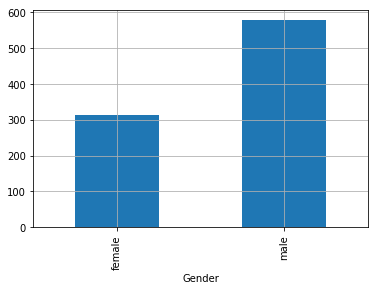

In [7]:
df.groupby(['Gender']).count()['Passenger ID'].plot(kind='bar', grid='on')

#### 2) Counting the number of passengers on the ship based on Class
For this grouping the data by the Class to get the class estimate

In [8]:
df.groupby(['Class']).count()

,Passenger ID,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
Class,,,,,,,,,
1,216,216,216,186,216,216,216,214,216
2,184,184,184,173,184,184,184,184,184
3,491,491,491,355,491,491,491,491,491


We can see that the class distribution of the passengers on the ship looks like the following:
+ Class 1: 216
+ Class 2: 184
+ Class 3: 491  

Again we see that the Age column shows a different count due to the null values present in the Age column

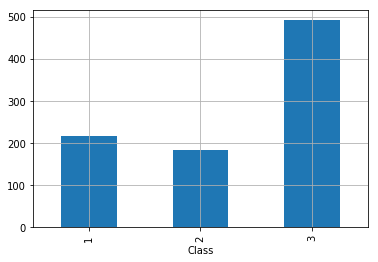

In [9]:
df.groupby(['Class']).count()['Passenger ID'].plot(kind='bar', grid='on')

#### 3) Counting the number children on the ship (Age < 16)

In [10]:
children = df['Age'] < 16
df[children].count()['Passenger ID']

84

From the above result we can see that there were 84 children on the ship.

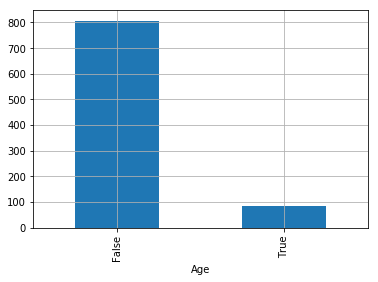

In [11]:
df.groupby(children).count()['Passenger ID'].plot(kind='bar', grid='on')

#### 4) Filling the missing values in the Age column  
Here the missing values are filled with the mean of the Age column, doing this step is important before deciding which passegers are children and which are not.

In [12]:
df.isnull().sum()

Passenger ID        0
Class               0
Name                0
Gender              0
Age               177
Siblings Count      0
Parents Count       0
Fare                0
Embarked            2
Survived            0
dtype: int64

Now, we see that the age column has 177 missing values and the Embarked column has just 2 missing values.  
Replacing the missing values in the age column with the mean value of the age column. 

In [13]:
df.head(7)

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0
5,6,3,Megan Clarkson,male,NaN,0,0,8458.3,Chicago,0
6,7,1,Molly Bower,male,54.0,0,0,51862.5,New York,0


In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
df.head(7)

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.000000,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.000000,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.000000,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.000000,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.000000,0,0,8050.0,New York,0
5,6,3,Megan Clarkson,male,30.014244,0,0,8458.3,Chicago,0
6,7,1,Molly Bower,male,54.000000,0,0,51862.5,New York,0


In [16]:
df.isnull().sum()

Passenger ID      0
Class             0
Name              0
Gender            0
Age               0
Siblings Count    0
Parents Count     0
Fare              0
Embarked          2
Survived          0
dtype: int64

Now filling the missing values in the Embarked column with the modal value in the Embarked column

In [17]:
# the modal value in the Embarked column
print df['Embarked'].mode()
print '\n'
print df['Embarked'].mode()[0]

0    New York
dtype: object


New York


In [18]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

Passenger ID      0
Class             0
Name              0
Gender            0
Age               0
Siblings Count    0
Parents Count     0
Fare              0
Embarked          0
Survived          0
dtype: int64

Now we can see that all the missing values in the dataframe have been removed.

#### 6) Number of passengers who were alone and who and who were with family

In [20]:
df.head()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0


The passengers with siblings and/or parents were the ones who were with family

In [21]:
family = df['Siblings Count'] + df['Parents Count'] > 0
df[family].count()

Passenger ID      354
Class             354
Name              354
Gender            354
Age               354
Siblings Count    354
Parents Count     354
Fare              354
Embarked          354
Survived          354
dtype: int64

From the above result we can conclude that there were 354 passengers with family on-board

#### 7) Percentage of passengers surviving in each class

In [22]:
df.groupby(['Class', 'Survived']).count()

Passenger ID  Name  Gender  Age  Siblings Count  \
Class Survived                                                    
1     0                   80    80      80   80              80   
      1                  136   136     136  136             136   
2     0                   97    97      97   97              97   
      1                   87    87      87   87              87   
3     0                  372   372     372  372             372   
      1                  119   119     119  119             119   

                Parents Count  Fare  Embarked  
Class Survived                                 
1     0                    80    80        80  
      1                   136   136       136  
2     0                    97    97        97  
      1                    87    87        87  
3     0                   372   372       372  
      1                   119   119       119

In [23]:
print "Percentage of passengers surviving the disaster in Class 1: %0.3f"%(136/(136.0+80.0)*100)
print "Percentage of passengers surviving the disaster in Class 2: %0.3f"%(87/(97.0+87.0)*100)
print "Percentage of passengers surviving the disaster in Class 3: %0.3f"%(119/(372.0+119.0)*100)


Percentage of passengers surviving the disaster in Class 1: 62.963
Percentage of passengers surviving the disaster in Class 2: 47.283
Percentage of passengers surviving the disaster in Class 3: 24.236


From the above result we can see that people in higher classes had better chances of survival

#### 8) Percentage of passengers who survived, based on Gender

In [24]:
df.groupby(['Gender', 'Survived']).count()

Passenger ID  Class  Name  Age  Siblings Count  \
Gender Survived                                                   
female 0                   81     81    81   81              81   
       1                  233    233   233  233             233   
male   0                  468    468   468  468             468   
       1                  109    109   109  109             109   

                 Parents Count  Fare  Embarked  
Gender Survived                                 
female 0                    81    81        81  
       1                   233   233       233  
male   0                   468   468       468  
       1                   109   109       109

In [25]:
print "Percentage of Female passengers surviving the disaster: %0.3f"%(233/(81.0+233.0)*100)
print "Percentage of Male passengers surviving the disaster:   %0.3f"%(109/(109.0+468.0)*100)

Percentage of Female passengers surviving the disaster: 74.204
Percentage of Male passengers surviving the disaster:   18.891


We can see clearly female passengers had better chances of survival than the male passengers, and the difference too is quite large.

#### 9) Did having family on board help the survival chances? 

In [26]:
df[family].count()

Passenger ID      354
Class             354
Name              354
Gender            354
Age               354
Siblings Count    354
Parents Count     354
Fare              354
Embarked          354
Survived          354
dtype: int64

In [27]:
df[family].groupby(['Survived']).count()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked
Survived,,,,,,,,,
0,175,175,175,175,175,175,175,175,175
1,179,179,179,179,179,179,179,179,179


In [28]:
print "Percentage survival rate of peple with family on board:%f"%(179/(179.0+175.0)*100)

Percentage survival rate of peple with family on board:50.564972


In [29]:
no_family = df['Siblings Count'] + df['Parents Count'] == 0
df[no_family].count()

Passenger ID      537
Class             537
Name              537
Gender            537
Age               537
Siblings Count    537
Parents Count     537
Fare              537
Embarked          537
Survived          537
dtype: int64

In [30]:
df[no_family].groupby(['Survived']).count()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked
Survived,,,,,,,,,
0,374,374,374,374,374,374,374,374,374
1,163,163,163,163,163,163,163,163,163


In [31]:
print "Percentage survival rate of peple without family on board:%f"%(163/(374.0+163.0)*100)

Percentage survival rate of peple without family on board:30.353818


People with family had a better (50.56 > 30.35) chance of surviving than people without family.

From the above analysis we can say people in upper class, females and people with families had a better chance of survival.

### 10) Making a predictive model

Let's have a look at our data frame

In [32]:
df.head()

,Passenger ID,Class,Name,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,1,3,Alexander Harris,male,22.0,1,0,7250.0,New York,0
1,2,1,Frank Parsons,female,38.0,1,0,71283.3,Los Angeles,1
2,3,3,Anthony Churchill,female,26.0,0,0,7925.0,New York,1
3,4,1,Alexandra Hughes,female,35.0,1,0,53100.0,New York,1
4,5,3,Joan Fraser,male,35.0,0,0,8050.0,New York,0


For training the model we must decide on the features on which we should train our model, Passenger ID and Name don't have anything to do with the survival hence dropping those features for our train and test set.

In [33]:
df = df.iloc[:,[1,3,4,5,6,7,8,9]]

Now, we don't have a specific family column in the dataframe, therefore adding a column representing whether the passenger had a family or not

In [34]:
df.head()

,Class,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,3,male,22.0,1,0,7250.0,New York,0
1,1,female,38.0,1,0,71283.3,Los Angeles,1
2,3,female,26.0,0,0,7925.0,New York,1
3,1,female,35.0,1,0,53100.0,New York,1
4,3,male,35.0,0,0,8050.0,New York,0


Having eliminated the irrelavent features, we can proceed further in processing the data,  
now let's convert the categorical data in the Gender column to numerical form. For this we can use LabelEncoder available in the scikit-learn module


In [35]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df.head()

,Class,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,3,1,22.0,1,0,7250.0,New York,0
1,1,0,38.0,1,0,71283.3,Los Angeles,1
2,3,0,26.0,0,0,7925.0,New York,1
3,1,0,35.0,1,0,53100.0,New York,1
4,3,1,35.0,0,0,8050.0,New York,0


Now let's see how many distict values are there in the Embarked column:

In [36]:
df['Embarked'].nunique()

3

Since there are just three unique values in the Embarked column, here also we can use a LabelEncoder to transform the categorical data to numerical form.

In [37]:
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
df.head()

,Class,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Survived
0,3,1,22.0,1,0,7250.0,2,0
1,1,0,38.0,1,0,71283.3,1,1
2,3,0,26.0,0,0,7925.0,2,1
3,1,0,35.0,1,0,53100.0,2,1
4,3,1,35.0,0,0,8050.0,2,0


Now seperating the features and label column.

In [38]:
# feature table
X = df.iloc[:,:7].values

In [39]:
# labels
y = df.iloc[:,[7]].values

Having seperated the features and the columns, let's split the data into training and test sets with test size being 30% of the total data, for this we'll use the train_test_split method from scikit-learn

In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


/home/piyush/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now let's fit the data to different machine learning models, it's important to note that we should scale the features before feeding it to the machine learning algorithms in almost all the algorithms except that of Decision trees or Random forest.

Hence we'll standardize the data for some of these algorithms and for that we'll use the StandardScaler module, the algorithms which require feature scaling will be used in a pipeline.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

In [42]:
clf_lr = LogisticRegression(penalty='l2', C=0.002, random_state=0)
clf_knn = KNeighborsClassifier(n_neighbors = 5, p=2, metric='minkowski')
clf_svm = SVC(kernel='linear', C=0.01, random_state=0)
clf_rf = RandomForestClassifier(n_estimators = 10, criterion='entropy', n_jobs=2, random_state=0)

In [43]:
pipe_lr = Pipeline([['sc', StandardScaler()],['clf', clf_lr]])
pipe_knn = Pipeline([['sc', StandardScaler()],['clf', clf_knn]])
pipe_svm = Pipeline([['sc', StandardScaler()],['clf', clf_svm]])
# no pipeline required for random forest

#### Evaluating the auc score of the above models using 10 fold cross validation

In [44]:
c, r = y_train.shape
y_train = y_train.reshape(c,)

In [45]:
clf_labels = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']
print '10-fold cross validatioin: \n'
for clf, label in zip([pipe_lr, pipe_knn, pipe_svm, clf_rf], clf_labels):
    scores = cross_val_score(estimator = clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print 'ROC AUC: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), label)

10-fold cross validatioin: 

ROC AUC: 0.84 (+/- 0.04) [Logistic Regression]
ROC AUC: 0.85 (+/- 0.03) [KNN]
ROC AUC: 0.84 (+/- 0.04) [SVM]
ROC AUC: 0.85 (+/- 0.04) [Random Forest]


## Tuning the hyperparameters of the models to get the best results

### 1) Logistic Regression model

In [46]:
pipe_lr.get_params()

{'clf': LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'clf__C': 0.002,
 'clf__class_weight': None,
 'clf__dual': False,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__max_iter': 100,
 'clf__multi_class': 'ovr',
 'clf__n_jobs': 1,
 'clf__penalty': 'l2',
 'clf__random_state': 0,
 'clf__solver': 'liblinear',
 'clf__tol': 0.0001,
 'clf__verbose': 0,
 'clf__warm_start': False,
 'memory': None,
 'sc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'steps': [['sc', StandardScaler(copy=True, with_mean=True, with_std=True)],
  ['clf',
   LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr',

In [47]:
from sklearn.grid_search import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0, 1000.0]
params = { 'clf__C': param_range,
            'clf__penalty': ['l2', 'l1']}
grid = GridSearchCV(estimator = pipe_lr, 
                    param_grid = params,
                    cv=10,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

/home/piyush/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', LogisticRegression(C=0.002, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)]]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__penalty': ['l2', 'l1'], 'clf__C': [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [48]:
for params, mean_score, scores in grid.grid_scores_:
    print('% 0.3f +/-%0.2f %r'%(mean_score, scores.std() / 2, params))


 0.832 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 0.0001}
 0.500 +/-0.00 {'clf__penalty': 'l1', 'clf__C': 0.0001}
 0.835 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 0.001}
 0.500 +/-0.00 {'clf__penalty': 'l1', 'clf__C': 0.001}
 0.848 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 0.01}
 0.765 +/-0.02 {'clf__penalty': 'l1', 'clf__C': 0.01}
 0.851 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 1.0}
 0.852 +/-0.02 {'clf__penalty': 'l1', 'clf__C': 1.0}
 0.852 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 10.0}
 0.852 +/-0.02 {'clf__penalty': 'l1', 'clf__C': 10.0}
 0.852 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 100.0}
 0.852 +/-0.02 {'clf__penalty': 'l1', 'clf__C': 100.0}
 0.852 +/-0.02 {'clf__penalty': 'l2', 'clf__C': 1000.0}
 0.852 +/-0.02 {'clf__penalty': 'l1', 'clf__C': 1000.0}


In [49]:
print('Best parameters: %s'% grid.best_params_)

Best parameters: {'clf__penalty': 'l1', 'clf__C': 10.0}


In [50]:
print('Accuracy: %0.2f'%grid.best_score_)

Accuracy: 0.85


Now, with parameter values of C=10 and penalty='l1' we can maximize the performance of the logistic regression classifier.

### 2) KNN model

In [51]:
pipe_knn.get_params()

{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform'),
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': 1,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform',
 'memory': None,
 'sc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'steps': [['sc', StandardScaler(copy=True, with_mean=True, with_std=True)],
  ['clf',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=1, n_neighbors=5, p=2,
              weights='uniform')]]}

Optimizing for n, that is, the number of nearest neighbors.

In [52]:
param_range = [1,2,3,4,5,6,7,8,9,10]
params = { 'clf__n_neighbors': param_range}
grid_knn = GridSearchCV(estimator = pipe_knn, 
                    param_grid = params,
                    cv=10,
                    scoring='roc_auc')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')]]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [53]:
for params, mean_score, scores in grid_knn.grid_scores_:
    print('% 0.3f +/-%0.2f %r'%(mean_score, scores.std() / 2, params))


 0.741 +/-0.02 {'clf__n_neighbors': 1}
 0.807 +/-0.02 {'clf__n_neighbors': 2}
 0.828 +/-0.02 {'clf__n_neighbors': 3}
 0.843 +/-0.02 {'clf__n_neighbors': 4}
 0.854 +/-0.01 {'clf__n_neighbors': 5}
 0.858 +/-0.01 {'clf__n_neighbors': 6}
 0.858 +/-0.02 {'clf__n_neighbors': 7}
 0.858 +/-0.02 {'clf__n_neighbors': 8}
 0.855 +/-0.01 {'clf__n_neighbors': 9}
 0.852 +/-0.02 {'clf__n_neighbors': 10}


In [54]:
print('Best parameters: %s'% grid_knn.best_params_)

Best parameters: {'clf__n_neighbors': 6}


In [55]:
print('Accuracy: %0.2f'%grid_knn.best_score_)

Accuracy: 0.86


With 6 neighbors we get accuracy as 86%. Now checking for the generalized accuracy of the knn model using nested cross validation.

### 3) SVM model

In [56]:
pipe_svm.get_params()

{'clf': SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=0, shrinking=True,
   tol=0.001, verbose=False),
 'clf__C': 0.01,
 'clf__cache_size': 200,
 'clf__class_weight': None,
 'clf__coef0': 0.0,
 'clf__decision_function_shape': 'ovr',
 'clf__degree': 3,
 'clf__gamma': 'auto',
 'clf__kernel': 'linear',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': 0,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False,
 'memory': None,
 'sc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'steps': [['sc', StandardScaler(copy=True, with_mean=True, with_std=True)],
  ['clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
     max_iter=-1, probability=False, random_state=

In [57]:
param_range = [0.001, 0.01, 0.10, 1.0, 10.0]
params = {'clf__C': param_range}
grid_svm = GridSearchCV(estimator = pipe_svm,
                       param_grid = params,
                       cv=10,
                       scoring='roc_auc',
                       n_jobs= -1
                       )
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[['sc', StandardScaler(copy=True, with_mean=True, with_std=True)], ['clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)]]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__C': [0.001, 0.01, 0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [58]:
for params, mean_score, scores in grid_svm.grid_scores_:
    print('% 0.3f +/-%0.2f %r'%(mean_score, scores.std() / 2, params))


 0.842 +/-0.02 {'clf__C': 0.001}
 0.837 +/-0.02 {'clf__C': 0.01}
 0.805 +/-0.02 {'clf__C': 0.1}
 0.801 +/-0.02 {'clf__C': 1.0}
 0.794 +/-0.02 {'clf__C': 10.0}


In [59]:
print('Best parameters: %s'% grid_svm.best_params_)

Best parameters: {'clf__C': 0.001}


In [60]:
print('Best Accuracy: %0.2f'%grid_svm.best_score_)

Best Accuracy: 0.84


We get an accuracy of 84% with the parameter C=0.01 in svm.

### 4) Random Forest Model

In [72]:
clf_rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [73]:
param_range = [1, 2, 5, 10, 20, 30, 40, 50, 60]
params = { 'min_samples_leaf': param_range}
grid_rf = GridSearchCV(estimator = clf_rf,
                      param_grid = params,
                      cv=10,
                      scoring='roc_auc')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50, 60]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [74]:
for params, mean_score, scores in grid_rf.grid_scores_:
    print('% 0.3f +/-%0.2f %r'%(mean_score, scores.std() / 2, params))


 0.845 +/-0.02 {'min_samples_leaf': 1}
 0.854 +/-0.02 {'min_samples_leaf': 2}
 0.859 +/-0.02 {'min_samples_leaf': 5}
 0.860 +/-0.02 {'min_samples_leaf': 10}
 0.843 +/-0.02 {'min_samples_leaf': 20}
 0.834 +/-0.02 {'min_samples_leaf': 30}
 0.825 +/-0.02 {'min_samples_leaf': 40}
 0.807 +/-0.03 {'min_samples_leaf': 50}
 0.803 +/-0.03 {'min_samples_leaf': 60}


In [75]:
print('Best parameters: %s'% grid_rf.best_params_)

Best parameters: {'min_samples_leaf': 10}


In [76]:
print('Best Accuracy: %0.2f'%grid_rf.best_score_)

Best Accuracy: 0.86


With the minimun sample leaf =10 and 10 estimators we get an accuracy of 86% with random forest

## Final model selection  
Having tuned hyperparameters of the different models let's see how well these models generalize after being tuned.

In [58]:
tuned_clf_lr = LogisticRegression(penalty='l1', C=10, random_state=0)
tuned_clf_knn = KNeighborsClassifier(n_neighbors = 6, p=2, metric='minkowski')
tuned_clf_svm = SVC(kernel='linear', C=0.001, random_state=0)
tuned_clf_rf = RandomForestClassifier(n_estimators = 10, min_samples_leaf=10, criterion='entropy', n_jobs=2, random_state=0)

In [59]:
tuned_pipe_lr = Pipeline([['sc', StandardScaler()],['clf', tuned_clf_lr]])
tuned_pipe_knn = Pipeline([['sc', StandardScaler()],['clf', tuned_clf_knn]])
tuned_pipe_svm = Pipeline([['sc', StandardScaler()],['clf', tuned_clf_svm]])
# no pipeline required for random forest

In [60]:
from sklearn.metrics import roc_auc_score

### Evaluating the model performance on the test-set

In [62]:
clf_labels = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']
for clf, label in zip([tuned_pipe_lr, tuned_pipe_knn, tuned_pipe_svm, tuned_clf_rf], clf_labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print 'ROC AUC: %0.2f  [%s]' %(roc_auc_score(y_test,y_pred), label)

ROC AUC: 0.79  [Logistic Regression]
ROC AUC: 0.75  [KNN]
ROC AUC: 0.53  [SVM]
ROC AUC: 0.79  [Random Forest]


### Evaluating the performance on the entire set with kfold cros validation

In [64]:
c, r = y.shape
y = y.reshape(c,)

In [65]:
clf_labels = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']
print '10-fold cross validatioin: \n'
for clf, label in zip([tuned_pipe_lr, tuned_pipe_knn, tuned_pipe_svm, tuned_clf_rf], clf_labels):
    scores = cross_val_score(estimator = clf, X=X, y=y, cv=10, scoring='roc_auc')
    print 'ROC AUC: %0.2f (+/- %0.2f) [%s]' %(scores.mean(), scores.std(), label)

10-fold cross validatioin: 

ROC AUC: 0.85 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.85 (+/- 0.04) [KNN]
ROC AUC: 0.84 (+/- 0.02) [SVM]
ROC AUC: 0.86 (+/- 0.04) [Random Forest]


## Conclusion

From the above results it is reasonalbe that we choose a Random Forest model with n_estimators=10 and min_samples_leaf=10 as are preferred classifier as it gives 86% on ROC_AUC.